In [1]:
import pandas as pd  
import numpy as np

# Load the provided training and testing datasets for credit card fraud detection analysis.
train_data = pd.read_csv("C:/Users/mraga/OneDrive/Desktop/Encryptix Internship/Task 2/fraudTrain.csv")
test_data = pd.read_csv("C:/Users/mraga/OneDrive/Desktop/Encryptix Internship/Task 2/fraudTest.csv")

# Display the first few rows of both datasets to understand the data structure.
print(train_data.head())
print(test_data.head())

# Check the data types and shape of the training dataset to identify any preprocessing needs.
print(train_data.dtypes)
print(train_data.shape)

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [2]:
# Select feature columns for model training, excluding the target variable.
feature_cols = train_data.columns[:-1]
print(feature_cols)

# Split the datasets into features (X) and target (Y) for both training and testing.
X_train = train_data[feature_cols]
Y_train = train_data['is_fraud']
X_test = test_data[feature_cols]
Y_test = test_data['is_fraud']

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')


In [3]:
# Identify categorical columns in the datasets to apply encoding later.
mask1 = train_data.dtypes == object
mask2 = test_data.dtypes == object
print(mask1)
print(mask2)

# Extract lists of categorical columns from both datasets.
categorical_cols1 = train_data.columns[mask1]
categorical_cols2 = test_data.columns[mask2]
print(categorical_cols1)

Unnamed: 0               False
trans_date_trans_time     True
cc_num                   False
merchant                  True
category                  True
amt                      False
first                     True
last                      True
gender                    True
street                    True
city                      True
state                     True
zip                      False
lat                      False
long                     False
city_pop                 False
job                       True
dob                       True
trans_num                 True
unix_time                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool
Unnamed: 0               False
trans_date_trans_time     True
cc_num                   False
merchant                  True
category                  True
amt                      False
first                     True
last                      True
gender                    T

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Initialize encoders for categorical data preprocessing.
le = LabelEncoder()
ohe = OneHotEncoder()

# Columns that require encoding based on internship dataset requirements.
cols = ["category", "gender", "city", "state", "job"]
# Apply label encoding to transform categorical variables into numerical values.
for col in cols:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])

# Display the encoded categorical columns to verify the transformation.
print(train_data[cols])
print(test_data[cols])

         category  gender  city  state  job
0               8       0   526     27  370
1               4       0   612     47  428
2               0       1   468     13  307
3               2       1    84     26  328
4               9       1   216     45  116
...           ...     ...   ...    ...  ...
1296670         0       1   330     44  215
1296671         1       1   813     20  360
1296672         1       1   346     32  308
1296673         1       1   471     41  485
1296674         1       1   782     26  467

[1296675 rows x 5 columns]
        category  gender  city  state  job
0             10       1   157     39  275
1             10       0    16     43  392
2              5       0    61     33  259
3              9       1   764      8  407
4             13       1   247     21  196
...          ...     ...   ...    ...  ...
555714         5       1   443     23  460
555715         7       1   401     42  198
555716         7       0   104     46  294
555717        

In [5]:
# Transform longitude values to absolute values to standardize the dataset.
clms = ['long', 'merch_long']
for col in clms:
    train_data[col] = train_data[col].abs()
    test_data[col] = test_data[col].abs()
print(train_data[clms])
print(test_data[clms])


             long  merch_long
0         81.1781   82.048315
1        118.2105  118.186462
2        112.2620  112.154481
3        112.1138  112.561071
4         79.4629   78.632459
...           ...         ...
1296670  112.4777  111.690765
1296671   77.5101   78.246528
1296672  105.8189  105.130529
1296673  102.5411  103.241160
1296674  113.8748  114.186110

[1296675 rows x 2 columns]
            long  merch_long
0        80.9355   81.200714
1       110.4360  109.960431
2        73.5365   74.196111
3        80.8191   80.883061
4        85.0170   85.884734
...          ...         ...
555714   91.8912   91.333331
555715   95.4401   96.186633
555716  118.9017  119.715054
555717  116.4493  117.080888
555718   97.4798   97.036372

[555719 rows x 2 columns]


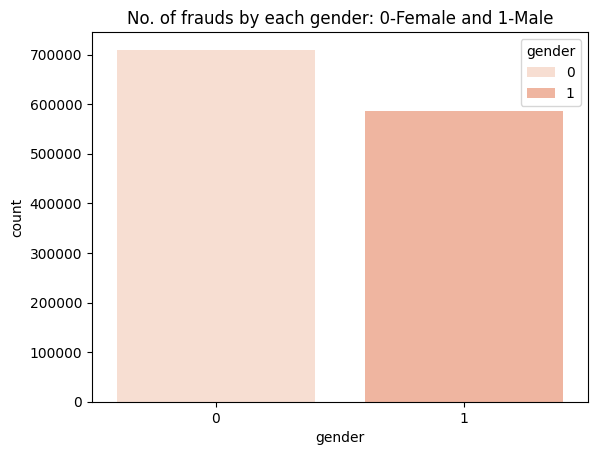

In [6]:
import seaborn as sns  
import matplotlib.pyplot as plt  
sns.set_palette('Reds')
sns.countplot(data=train_data, x='gender', hue='gender')
plt.title('No. of frauds by each gender: 0-Female and 1-Male')
plt.show()

            category    gender      city     state       job       amt  \
category    1.000000 -0.028259  0.000784  0.000211  0.003490  0.030867   
gender     -0.028259  1.000000  0.016039 -0.031794 -0.079908  0.001034   
city        0.000784  0.016039  1.000000 -0.043064  0.020446 -0.000565   
state       0.000211 -0.031794 -0.043064  1.000000  0.042915  0.001718   
job         0.003490 -0.079908  0.020446  0.042915  1.000000 -0.000628   
amt         0.030867  0.001034 -0.000565  0.001718 -0.000628  1.000000   
zip         0.002371 -0.065951  0.074757 -0.116264 -0.005678  0.001843   
lat        -0.008660  0.042935 -0.032044  0.213270 -0.027593 -0.001926   
long        0.000767 -0.050404  0.066703 -0.132465  0.002729  0.000187   
city_pop    0.009386 -0.028649  0.034923 -0.012197 -0.054945  0.005818   
merch_lat  -0.008519  0.042645 -0.031828  0.211844 -0.027412 -0.001873   
merch_long  0.000736 -0.050350  0.066718 -0.132346  0.002727  0.000151   

                 zip       lat      l

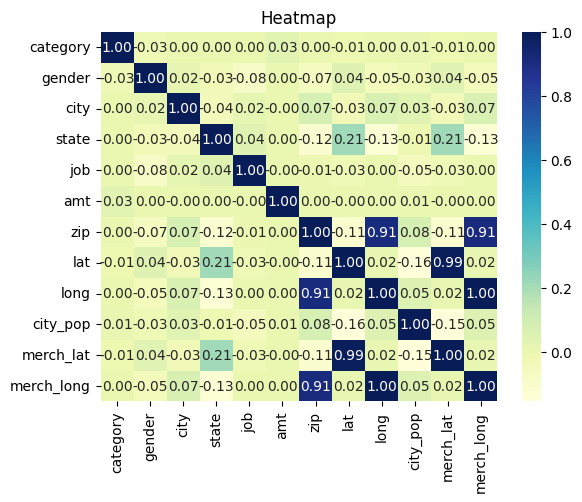

In [7]:
feature_cols = ["category", "gender", "city", "state", "job", "amt", "zip", "lat", "long", "city_pop", "merch_lat", "merch_long"]
corr_values = train_data[feature_cols].corr()
print(corr_values)

sns.heatmap(data=corr_values, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap')
plt.show()

In [8]:
X_train = np.array(train_data[feature_cols])
Y_train = np.array(train_data['is_fraud'])
X_test = np.array(test_data[feature_cols])
Y_test = np.array(test_data['is_fraud'])

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegression(solver='liblinear').fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve, precision_recall_fscore_support, accuracy_score
def evaluate_metrics(yt, yp):
    result_pos = {}
    result_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    result_pos['precision'] = precision
    result_pos['recall'] = recall
    result_pos['f1_score'] = f_beta
    return result_pos

print(evaluate_metrics(Y_test, lr_pred))

{'accuracy': 0.9955049224518147, 'precision': array([0.99613768, 0.        ]), 'recall': array([0.99936233, 0.        ]), 'f1_score': array([0.9977474, 0.       ])}


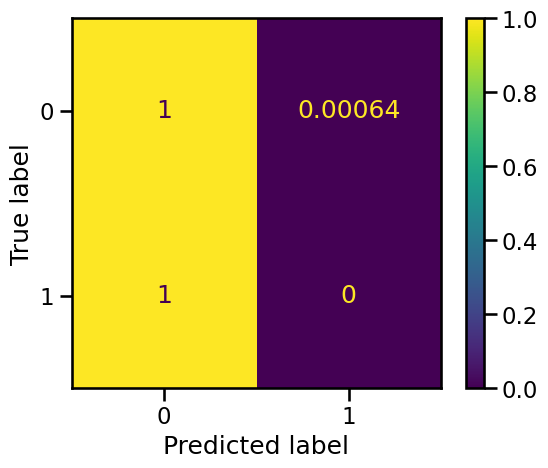

In [13]:
cf = confusion_matrix(Y_test, lr_pred, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=lr.classes_)
disp.plot()

plt.show()

{'accuracy': 0.997495136930715, 'precision': array([0.9985842 , 0.69121381]), 'recall': array([0.99890168, 0.63449883]), 'f1_score': array([0.99874292, 0.66164317])}


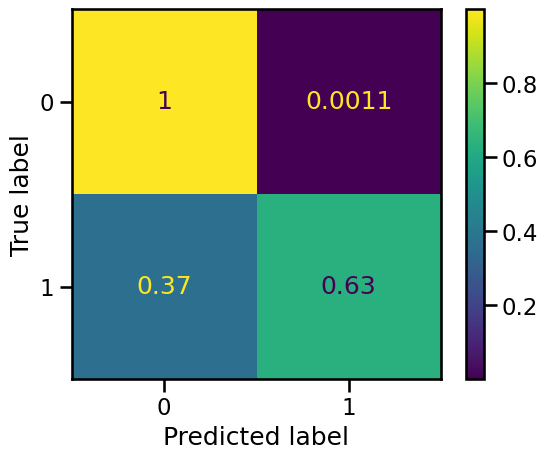

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=6)
dtc = dtc.fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)

print(evaluate_metrics(Y_test, dtc_pred))

cf = confusion_matrix(Y_test, dtc_pred, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=dtc.classes_)
disp.plot()